## Run these to initialise functions

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
def simulate(circuit, shots=1024, x="0", verbose=False):
    names = []
    regs = []
    for q in circuit.qubits:
        name = q.register.name
        size = len(q.register)
        if name not in names:
            names.append(name)
            regs.append(size)

    if verbose: print(names, regs)

    #assuming that we only have 2: control + anciallary
    qra = QuantumRegister(regs[0], name=names[0])
    if len(regs) > 1:
        qran = QuantumRegister(regs[1], name=names[1])
        qa = QuantumCircuit(qra,qran)
    else:
        qa = QuantumCircuit(qra)

    if len(x) != sum(regs): x += "0" * (sum(regs) - len(x))
    x = x[::-1]
    if verbose: print(x)
    for bit in range(len(x)):
        if verbose: print(x[bit], type(x[bit]))
        if x[bit] != "0":
            qa.x(bit)
    qa.barrier()

    qa.extend(circuit)

    if verbose:
        print(qa)

    backend = BasicAer.get_backend('qasm_simulator')
    results = execute(qa, backend=backend, shots=shots).result()
    answer = results.get_counts()
    return answer

In [2]:
def results(qc, x="0", verbose=False):
    qc2 = qc.copy()
    qc2.measure_all()
    return sorted(list(simulate(qc2, x=x, verbose=verbose)))
def reverse_results(qc, x="0", verbose=False):
    qc2 = qc.inverse().copy()
    return results(qc2, x, verbose)

In [3]:
def get_graphs(qc, verbose=False):
    forward_graph = {}
    backward_graph = {}
    n = qc.num_qubits
    for i in range(2**n):
        b_string = format(i, '0' + str(n) + 'b')
        forward_graph[b_string] = results(qc, b_string)
        backward_graph[b_string] = reverse_results(qc, b_string)
        if verbose: print(b_string, forward_graph[b_string], backward_graph[b_string])
    return forward_graph, backward_graph

In [4]:
def create_map(f):
    if type(f) == QuantumCircuit: f, _ = get_graphs(f, verbose=False)
    d = {}
    for f_i in f:
        o = f[f_i]
        d[tuple([k for k,v in f.items() if v == o])] = tuple(o)
    return d

In [5]:
import random
def create_random_circuit(n,k):
    qc = QuantumCircuit(n)
    for i in range(k):
        if random.random() < 0.25:
            qc.x(i%n)
        if random.random() < 0.25:
            qc.y(i%n)
        if random.random() < 0.25:
            qc.z(i%n)
        if random.random() < 0.25:
            qc.h(i%n)
        if n > 1 and random.random() < 0.25:
            a = i%n
            b = random.randint(0,n-1)
            while b == a: a = random.randint(0,n-1)
            qc.cx(a, b)
    return qc

## Create and test circuits here

In [10]:
q = create_random_circuit(5, 10)
create_map(q)

{('00000', '00001', '01000', '01001'): ('10010', '10110', '11010', '11110'),
 ('00010', '00011', '01010', '01011'): ('10001', '10101', '11001', '11101'),
 ('00100', '00101', '01100', '01101'): ('10011', '10111', '11011', '11111'),
 ('00110', '00111', '01110', '01111'): ('10000', '10100', '11000', '11100'),
 ('10000', '10001', '11000', '11001'): ('00010', '00110', '01010', '01110'),
 ('10010', '10011', '11010', '11011'): ('00001', '00101', '01001', '01101'),
 ('10100', '10101', '11100', '11101'): ('00011', '00111', '01011', '01111'),
 ('10110', '10111', '11110', '11111'): ('00000', '00100', '01000', '01100')}

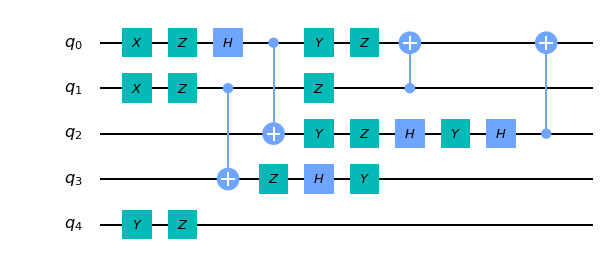

In [11]:
q.draw(output='mpl')

In [12]:
get_graphs(q, verbose=False)

({'00000': ['10010', '10110', '11010', '11110'],
  '00001': ['10010', '10110', '11010', '11110'],
  '00010': ['10001', '10101', '11001', '11101'],
  '00011': ['10001', '10101', '11001', '11101'],
  '00100': ['10011', '10111', '11011', '11111'],
  '00101': ['10011', '10111', '11011', '11111'],
  '00110': ['10000', '10100', '11000', '11100'],
  '00111': ['10000', '10100', '11000', '11100'],
  '01000': ['10010', '10110', '11010', '11110'],
  '01001': ['10010', '10110', '11010', '11110'],
  '01010': ['10001', '10101', '11001', '11101'],
  '01011': ['10001', '10101', '11001', '11101'],
  '01100': ['10011', '10111', '11011', '11111'],
  '01101': ['10011', '10111', '11011', '11111'],
  '01110': ['10000', '10100', '11000', '11100'],
  '01111': ['10000', '10100', '11000', '11100'],
  '10000': ['00010', '00110', '01010', '01110'],
  '10001': ['00010', '00110', '01010', '01110'],
  '10010': ['00001', '00101', '01001', '01101'],
  '10011': ['00001', '00101', '01001', '01101'],
  '10100': ['00011',